In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ulklc/covid19-timeseries/master/countryReport/raw/rawReport.csv")

In [21]:
df.head()

,day,countryCode,countryName,region,lat,lon,confirmed,recovered,death
0,2020/01/22,AD,Andorra,Europe,42.5,1.5,0,0,0
1,2020/01/23,AD,Andorra,Europe,42.5,1.5,0,0,0
2,2020/01/24,AD,Andorra,Europe,42.5,1.5,0,0,0
3,2020/01/25,AD,Andorra,Europe,42.5,1.5,0,0,0
4,2020/01/26,AD,Andorra,Europe,42.5,1.5,0,0,0


In [22]:
df.drop(['countryCode', 'lat', 'lon'], axis=1, inplace=True)
# do that operation with column and reflect the changes inplace of this same df 

In [23]:
df.head()

,day,countryName,region,confirmed,recovered,death
0,2020/01/22,Andorra,Europe,0,0,0
1,2020/01/23,Andorra,Europe,0,0,0
2,2020/01/24,Andorra,Europe,0,0,0
3,2020/01/25,Andorra,Europe,0,0,0
4,2020/01/26,Andorra,Europe,0,0,0


In [24]:
df.rename(columns={
    'day':'Date',
    'countryName':'Country',
    'region':'Region',
    'confirmed':'Confirmed',
    'recovered':'Recovered',
    'death':'Deaths'
}, inplace=True)

In [25]:
df.head()

,Date,Country,Region,Confirmed,Recovered,Deaths
0,2020/01/22,Andorra,Europe,0,0,0
1,2020/01/23,Andorra,Europe,0,0,0
2,2020/01/24,Andorra,Europe,0,0,0
3,2020/01/25,Andorra,Europe,0,0,0
4,2020/01/26,Andorra,Europe,0,0,0


In [26]:
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
df.head()

,Date,Country,Region,Confirmed,Recovered,Deaths
0,2020-01-22,Andorra,Europe,0,0,0
1,2020-01-23,Andorra,Europe,0,0,0
2,2020-01-24,Andorra,Europe,0,0,0
3,2020-01-25,Andorra,Europe,0,0,0
4,2020-01-26,Andorra,Europe,0,0,0


In [28]:
df.describe()

,Confirmed,Recovered,Deaths
count,4.837500e+04,4.837500e+04,48375.000000
mean,3.376626e+04,1.929335e+04,1481.306811
std,2.364899e+05,1.391208e+05,9004.968511
min,0.000000e+00,0.000000e+00,0.000000
25%,6.000000e+00,0.000000e+00,0.000000
50%,3.100000e+02,8.000000e+01,6.000000
75%,4.605000e+03,1.770000e+03,93.000000
max,6.297650e+06,3.537272e+06,189929.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48375 entries, 0 to 48374
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       48375 non-null  datetime64[ns]
 1   Country    48375 non-null  object        
 2   Region     48375 non-null  object        
 3   Confirmed  48375 non-null  int64         
 4   Recovered  48375 non-null  int64         
 5   Deaths     48375 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 2.2+ MB


###### If some data are missing, must be fill and clean

In [30]:
# FILLING THE MISSING DATA USING PANDAS FILLNA METHOD
df = df.fillna('NA')    
# MORE APPROACH CAN BE USED USING ML PKGS

###### Group-by QUERY in pandas

In [31]:
grp_by_ctry = df.groupby('Country')[['Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
# THE RESET INDEX METHOD ADD INDICES FOR PROPER NUMBERING AND STRUCTURE
grp_by_ctry_and_date = df.groupby(['Country', 'Date'])[['Country', 'Date', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [32]:
grp_by_ctry.head()

,Country,Confirmed,Deaths,Recovered
0,Afghanistan,3321935,99023,1801951
1,Albania,466889,13848,261648
2,Algeria,2572853,128209,1725387
3,Andorra,131820,7369,100736
4,Angola,91637,4123,32455


In [33]:
grp_by_ctry_and_date.head()

,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0


In [34]:
# CONFIRMED MORE THAN 100
over_hundred_cases = df[df['Confirmed']>100]

In [35]:
over_hundred_cases

,Date,Country,Region,Confirmed,Recovered,Deaths
60,2020-03-22,Andorra,Europe,113,1,1
61,2020-03-23,Andorra,Europe,133,1,1
62,2020-03-24,Andorra,Europe,164,1,1
63,2020-03-25,Andorra,Europe,188,1,1
64,2020-03-26,Andorra,Europe,224,1,3
...,...,...,...,...,...,...
48370,2020-08-29,Zimbabwe,Africa,6406,5056,196
48371,2020-08-30,Zimbabwe,Africa,6412,5061,196
48372,2020-08-31,Zimbabwe,Africa,6497,5221,202
48373,2020-09-01,Zimbabwe,Africa,6559,5241,203


#### However, giving visualization of the trends tells more insight than the crunchy numbers of statistics and result intrinsically. Even though high dimensional data may sometimes be non-visualisable, so statistically results and numbers may pay important roles there. But still let's get some quick initial insight on our available dataset

In [36]:
print("""
                    =====================> VISUALIZATION TRENDS OF THE DATASET ====================\n\n\n
""")


                    =====================> VISUALIZATION TRENDS OF THE DATASET ====================






In [37]:
import matplotlib.pyplot as plt

In [38]:
# LET'S CHECK THE TOTAL NUMBER OF COUNTRY IN THERE
countries = df['Country'].unique()
print(f"{len(countries)} countries around the world has a blow on COVID-19")

215 countries around the world has a blow on COVID-19


###### Now let's do a visual trends for each of those country as the pandemic is moving from day one to date

In [39]:
def visualize(arg):
    for index in range(arg):
        country_indices = df[df['Country']==countries[index]].reset_index()
        plt.scatter(np.arange(0, len(country_indices)), country_indices['Confirmed'], color='yellow', label='Confirmed')
        plt.scatter(np.arange(0, len(country_indices)), country_indices['Recovered'], color='green', label='Recovered')
        plt.scatter(np.arange(0, len(country_indices)), country_indices['Deaths'], color='red', label='Deaths')
        plt.title(countries[index])
        plt.xlabel('Days since first suspect')
        plt.ylabel('Number of cases')
        plt.legend()
        plt.show()

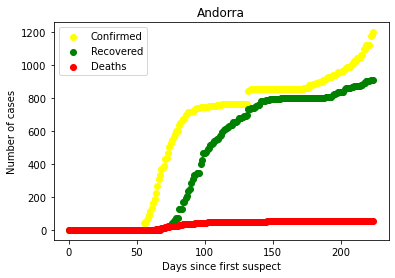

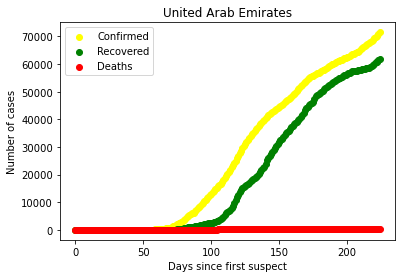

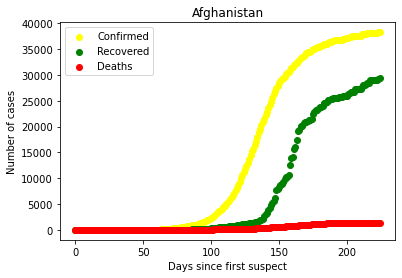

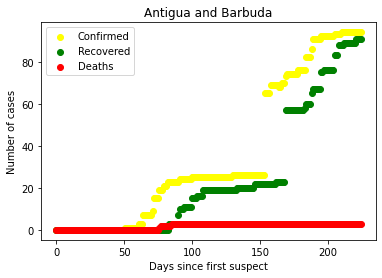

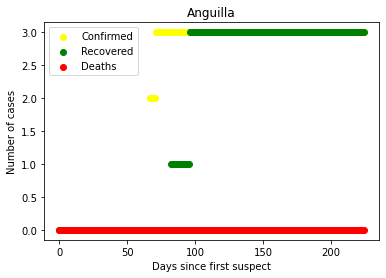

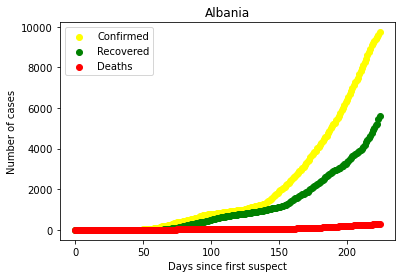

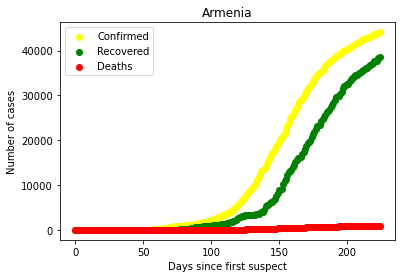

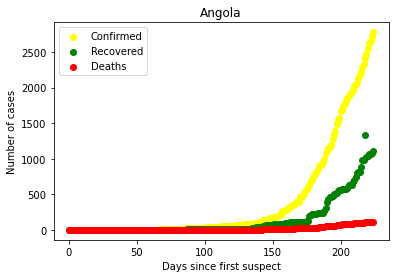

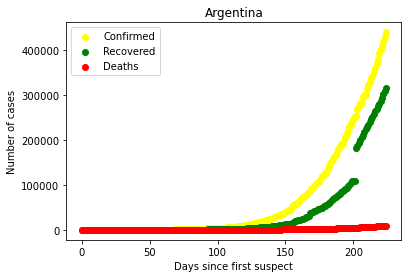

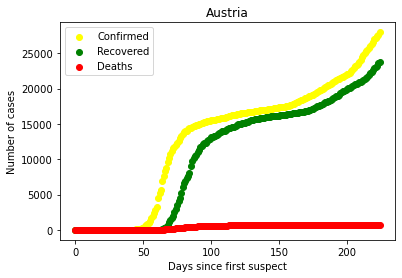

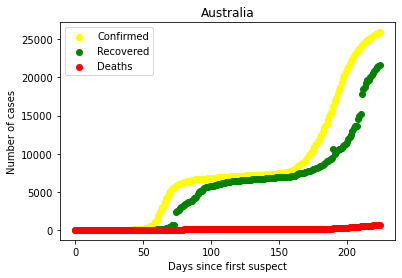

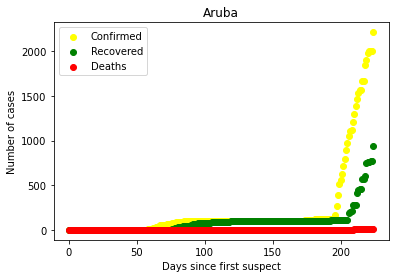

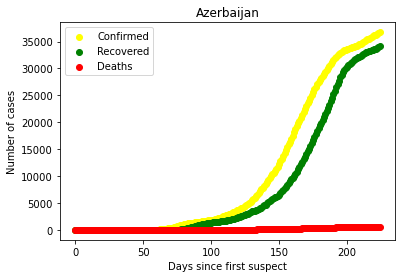

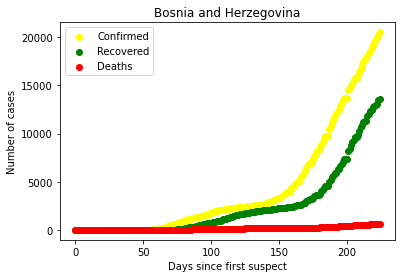

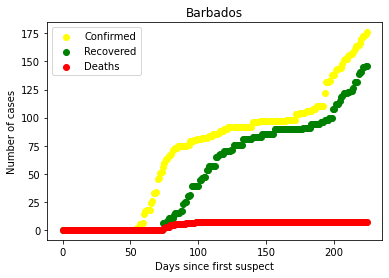

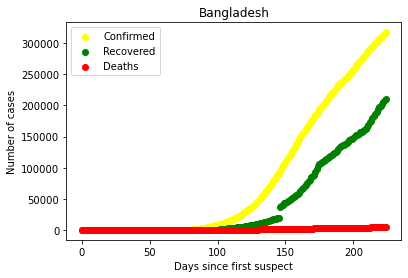

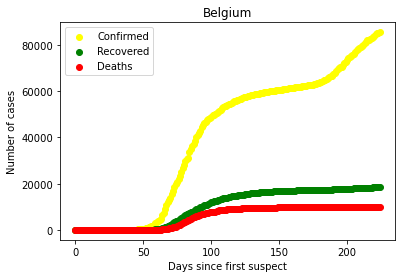

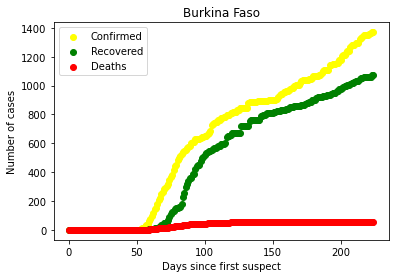

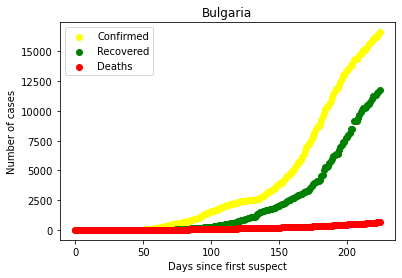

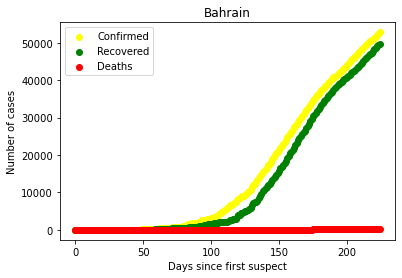

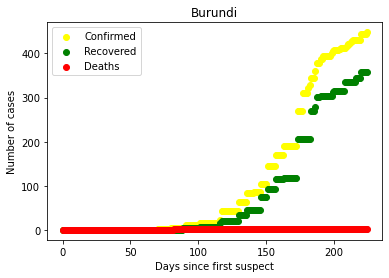

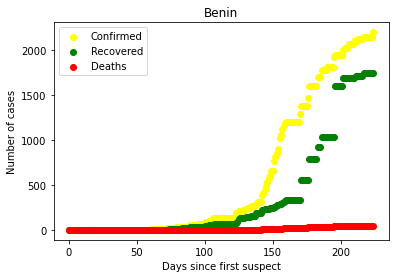

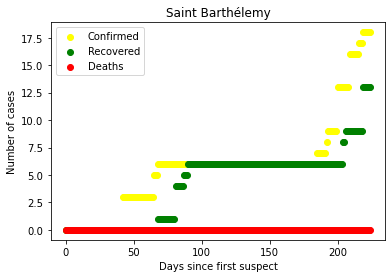

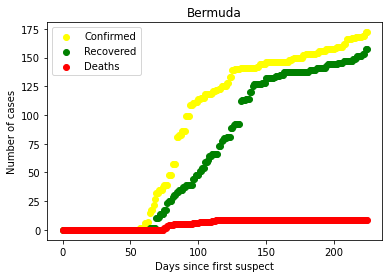

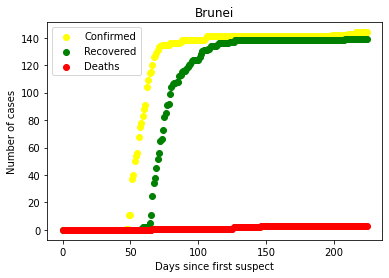

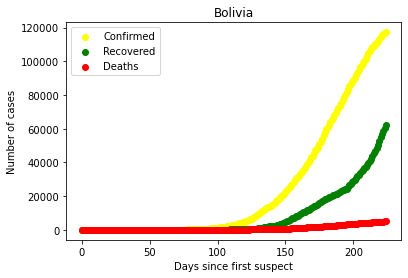

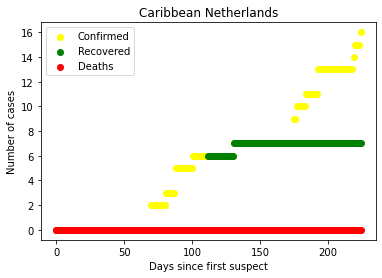

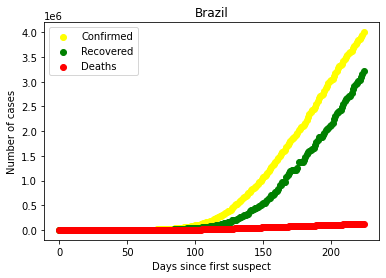

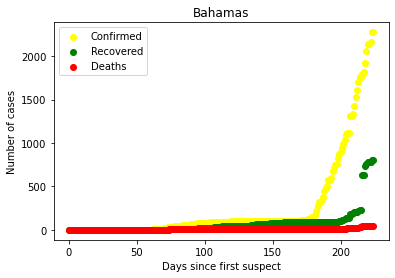

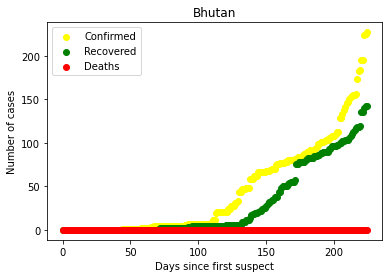

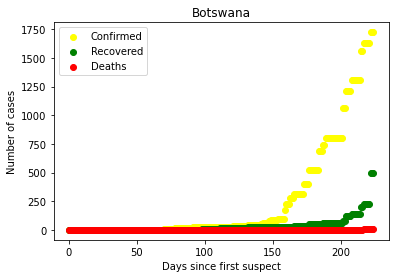

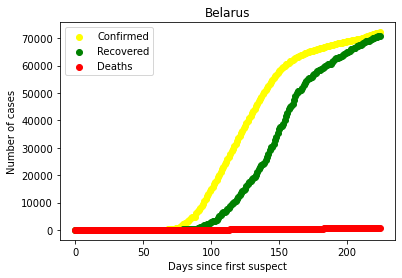

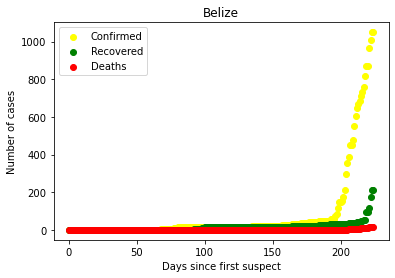

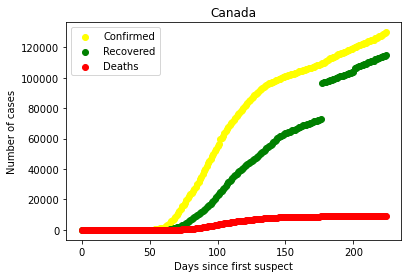

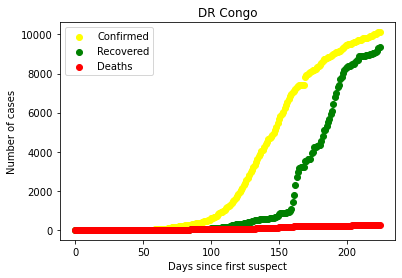

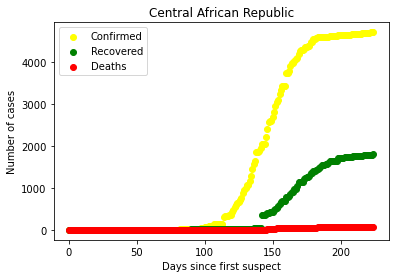

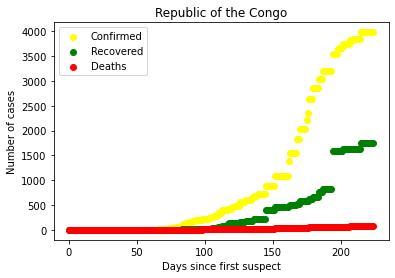

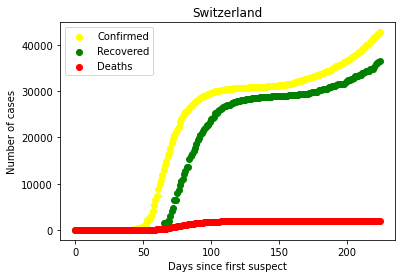

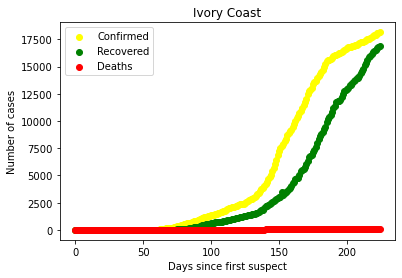

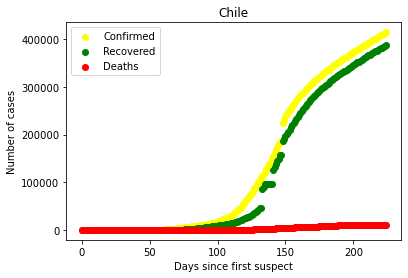

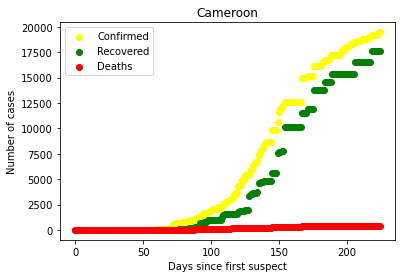

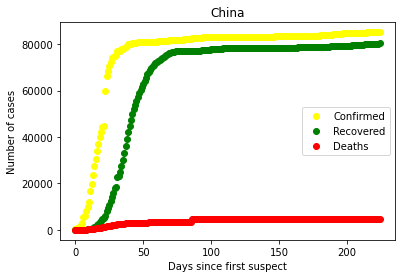

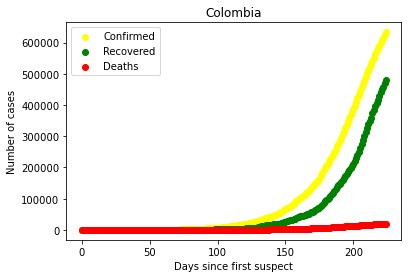

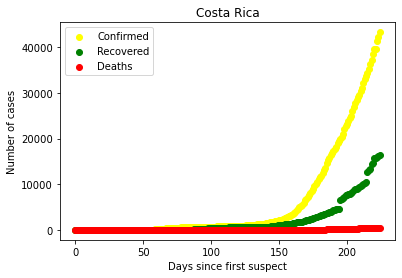

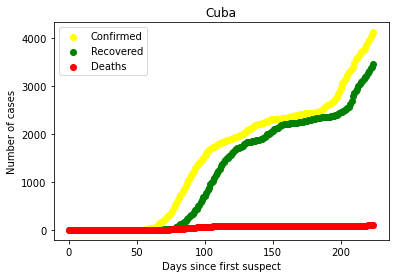

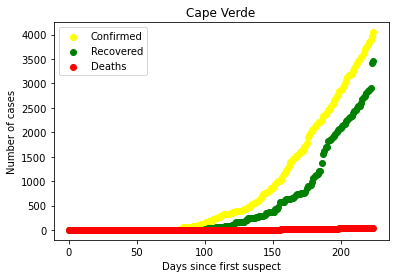

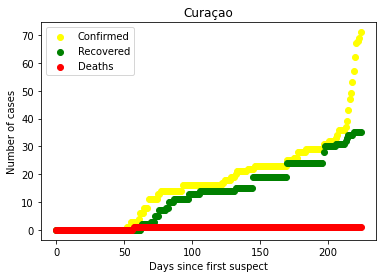

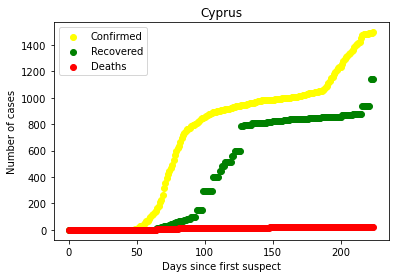

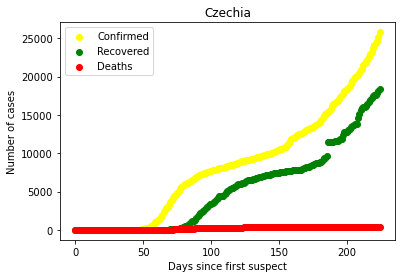

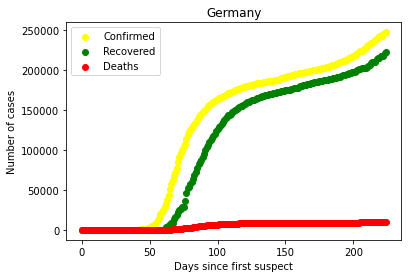

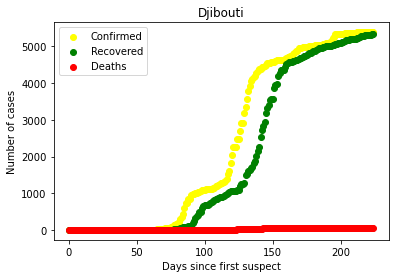

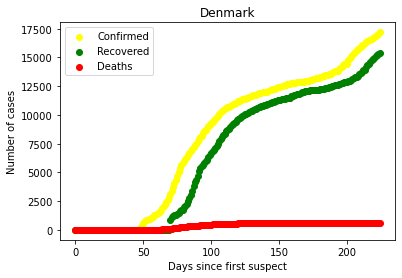

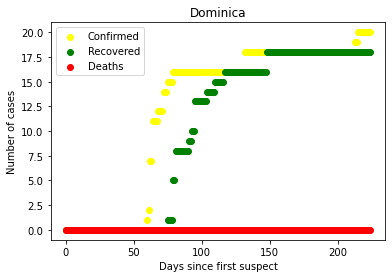

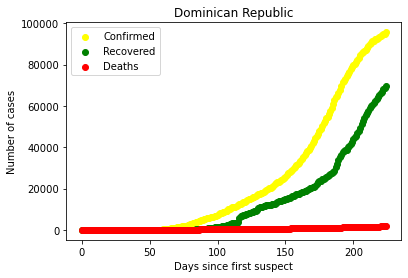

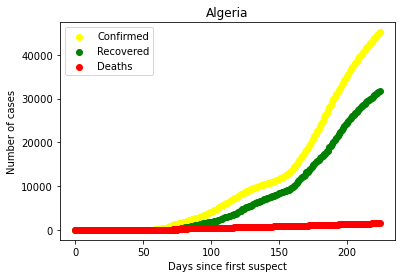

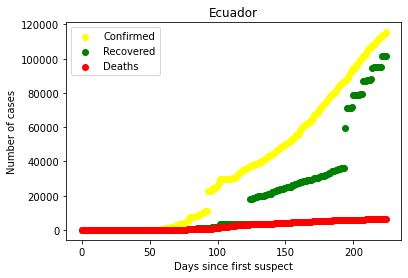

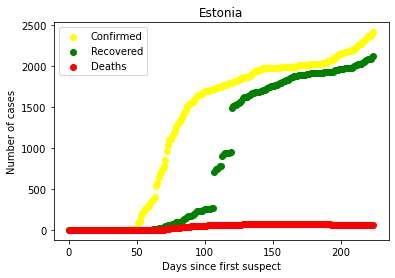

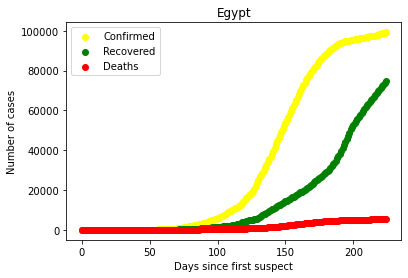

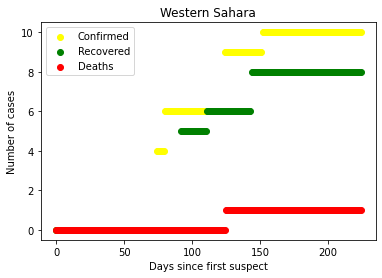

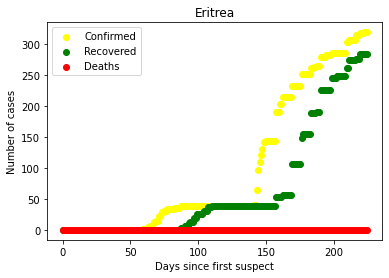

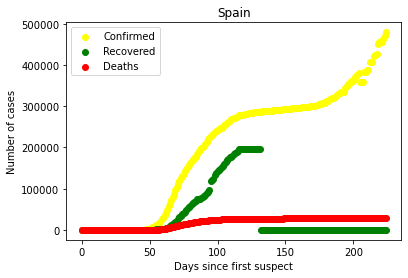

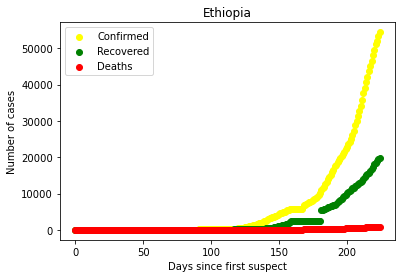

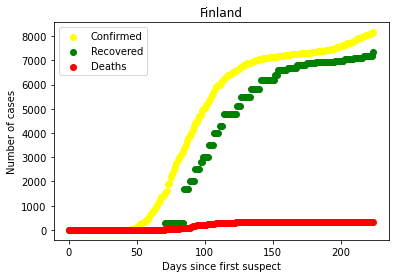

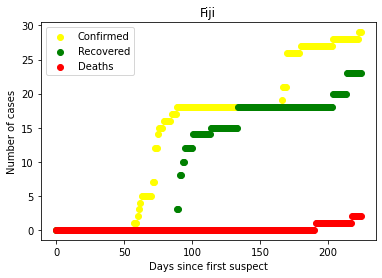

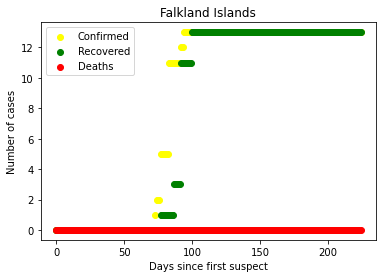

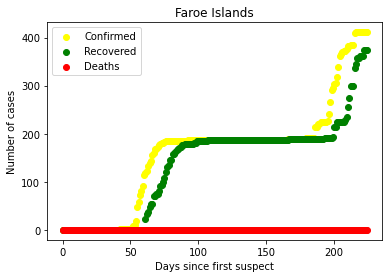

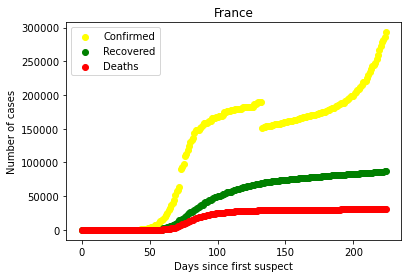

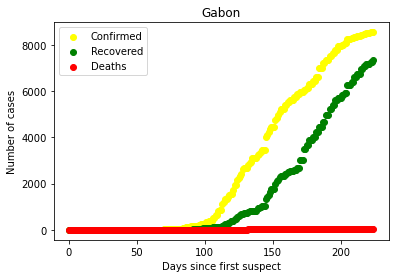

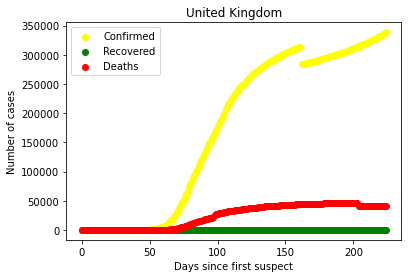

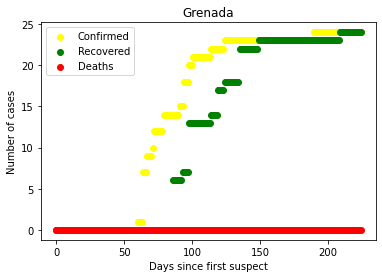

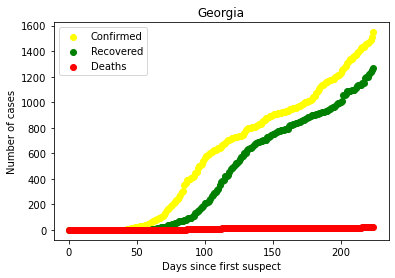

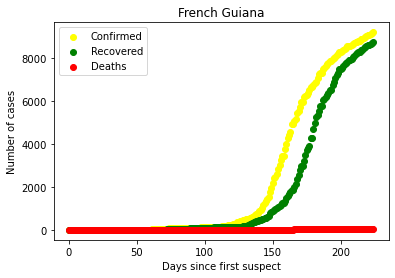

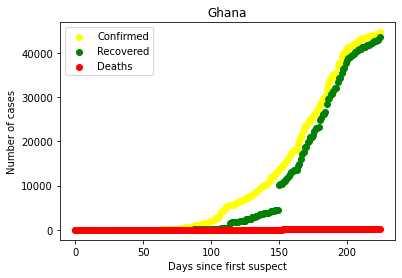

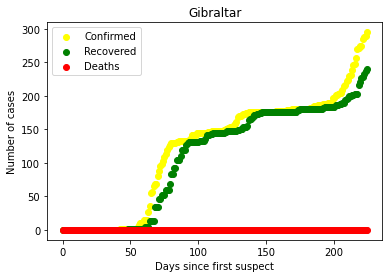

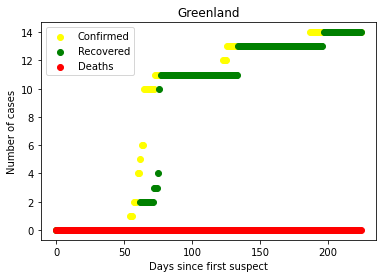

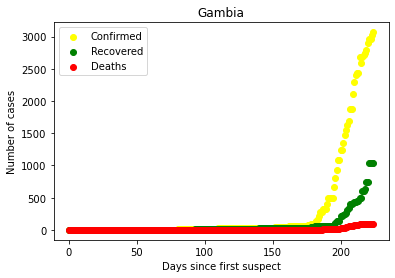

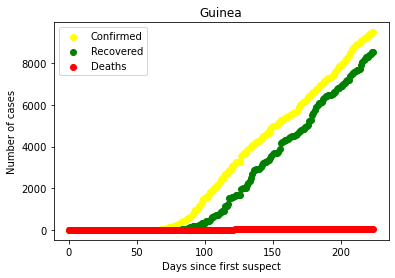

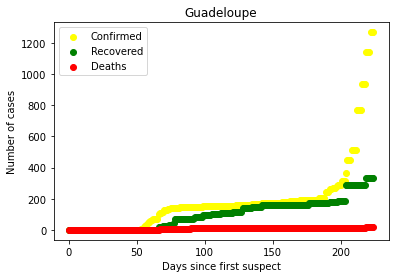

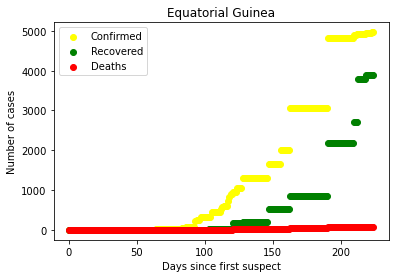

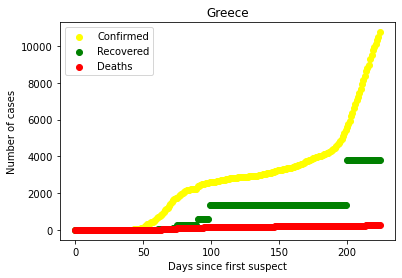

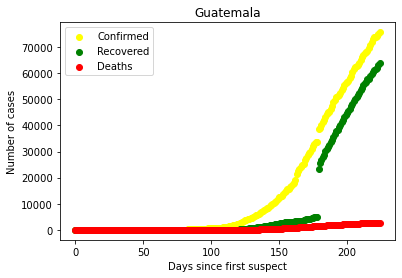

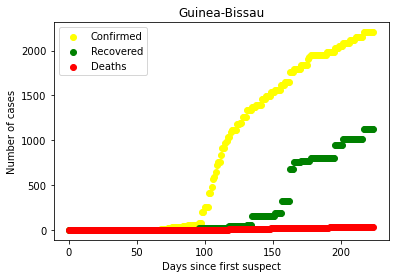

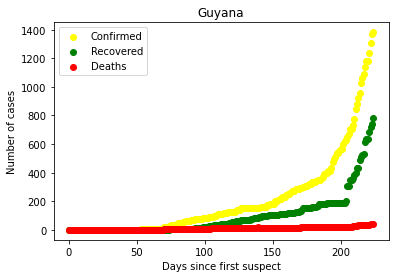

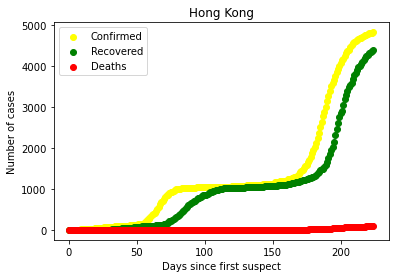

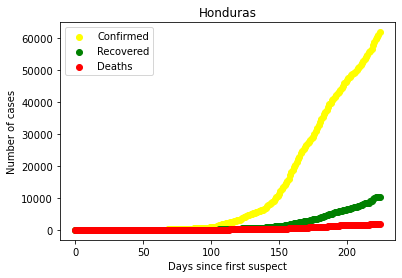

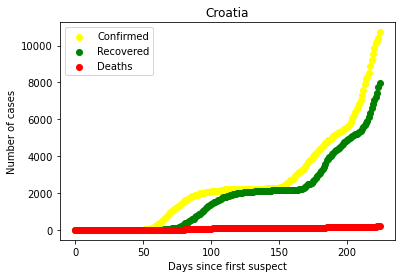

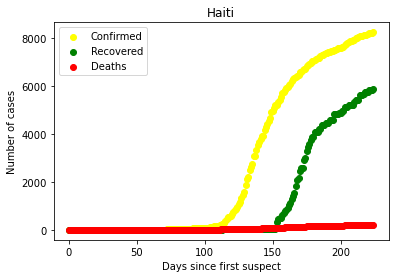

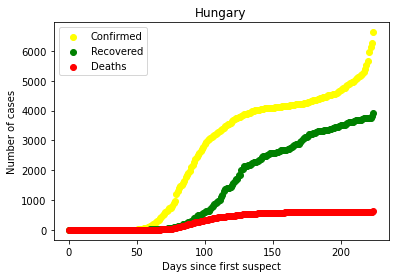

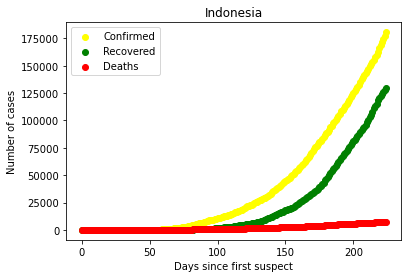

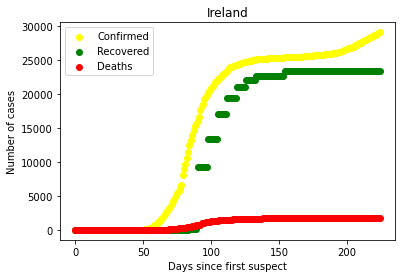

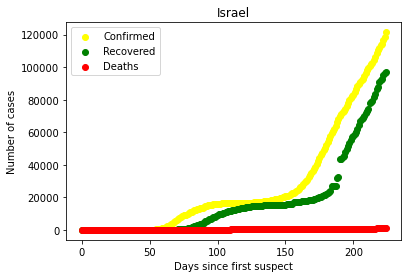

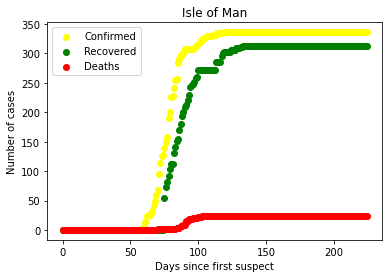

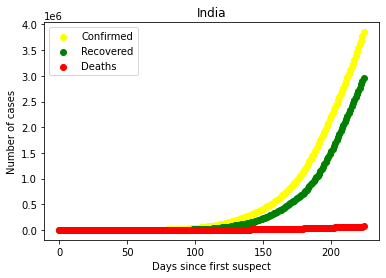

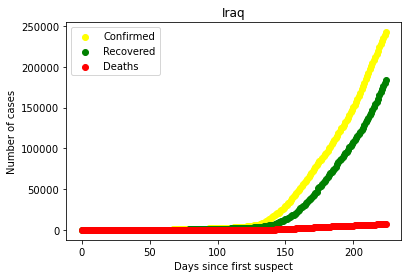

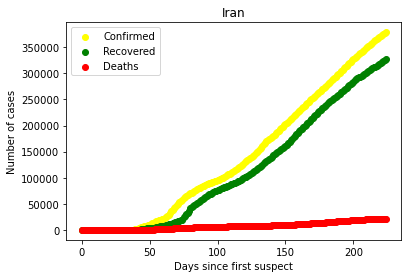

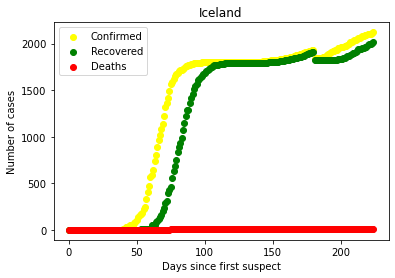

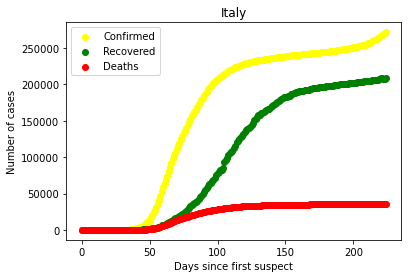

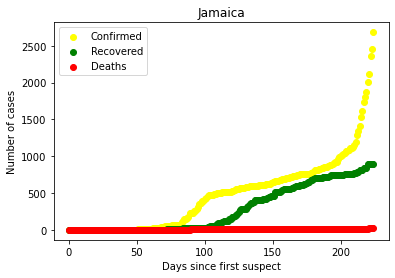

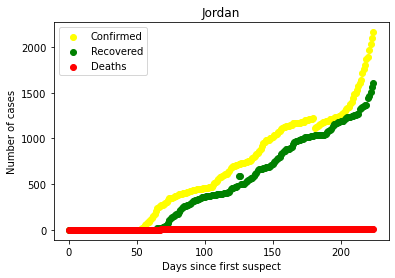

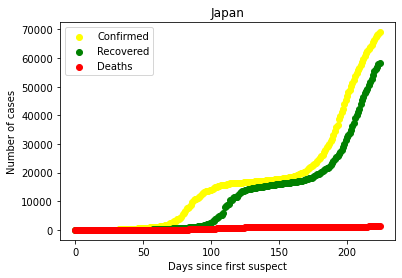

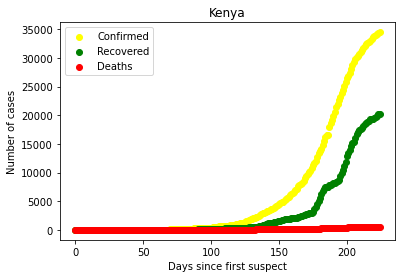

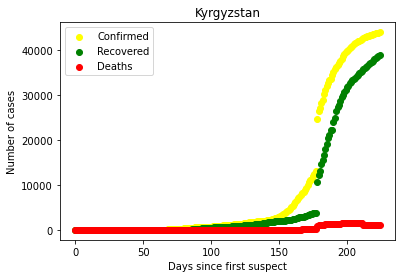

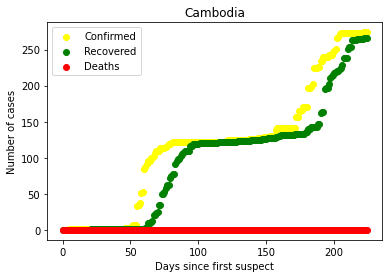

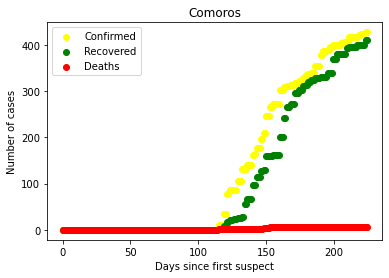

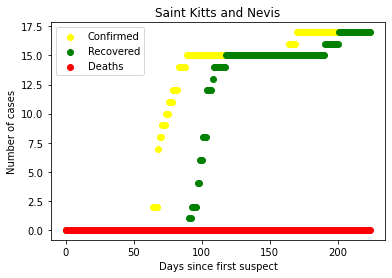

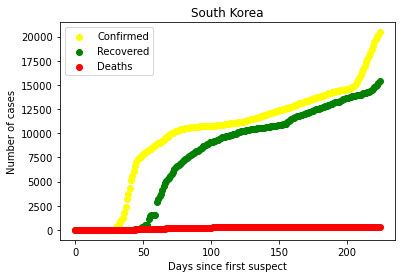

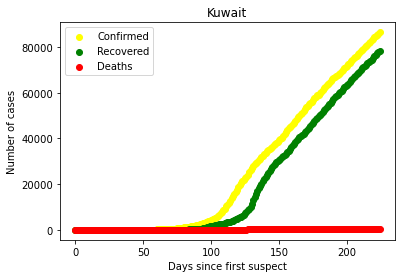

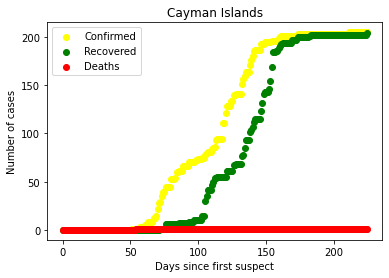

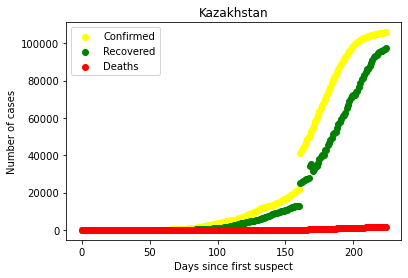

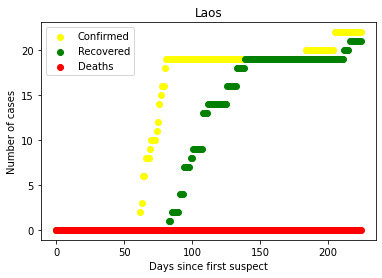

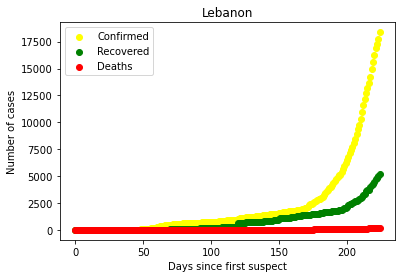

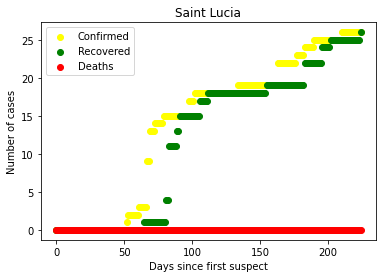

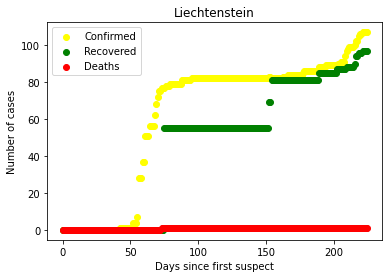

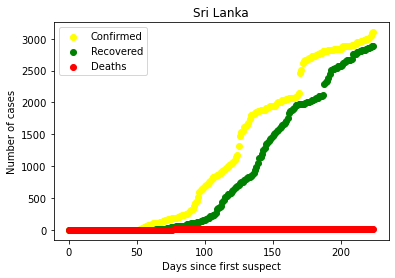

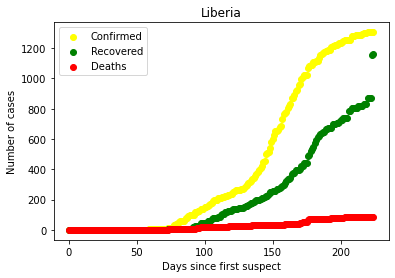

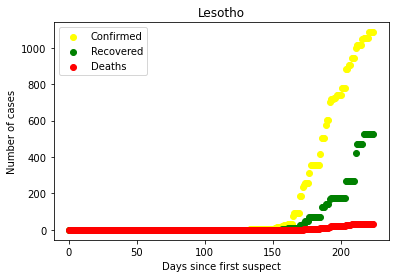

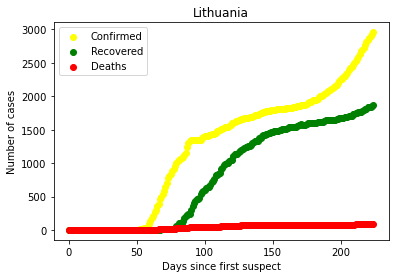

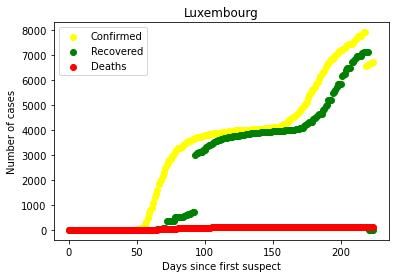

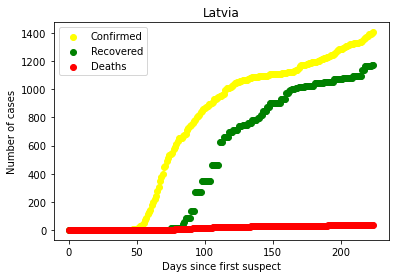

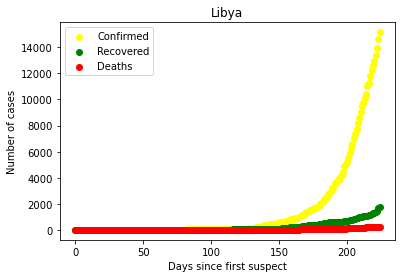

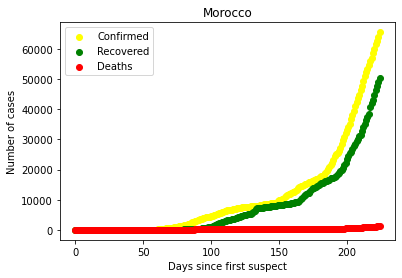

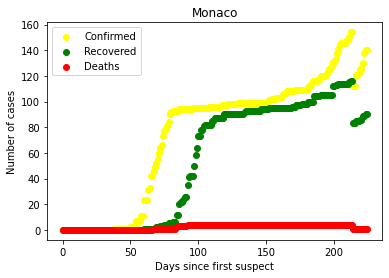

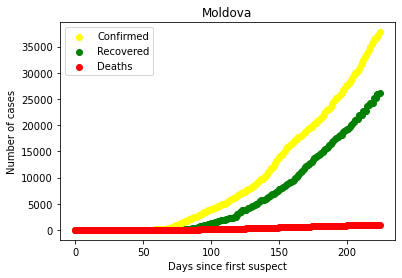

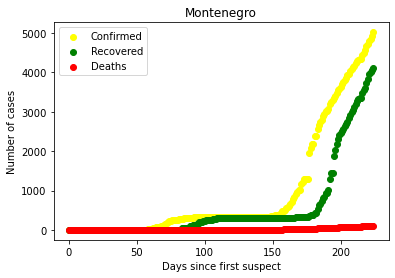

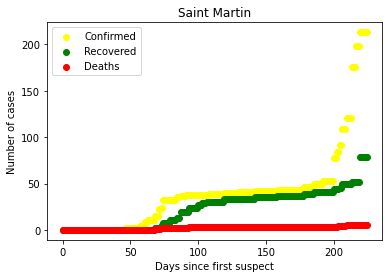

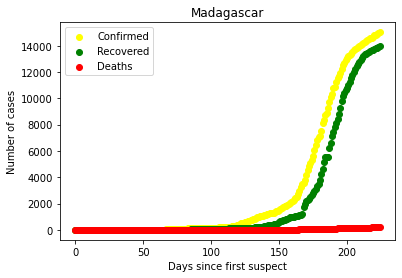

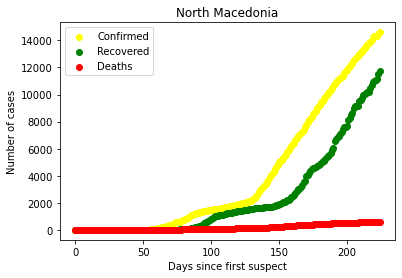

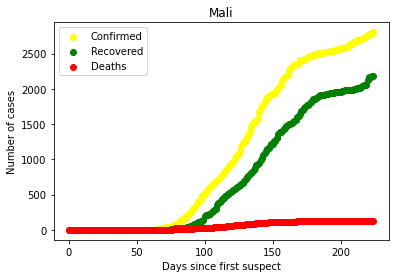

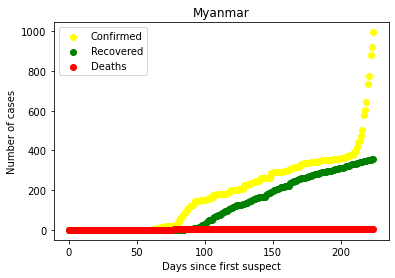

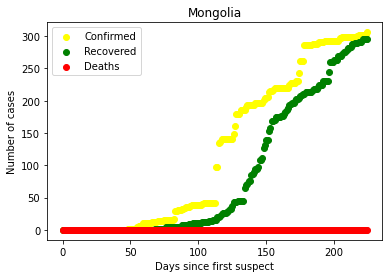

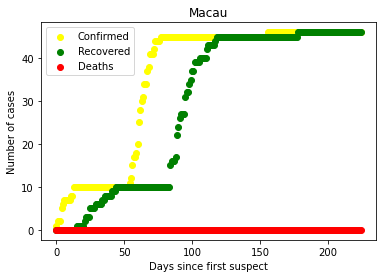

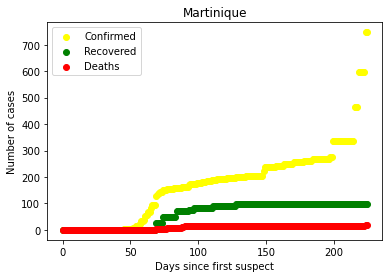

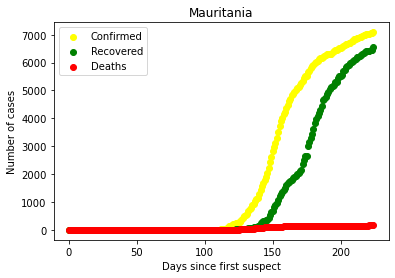

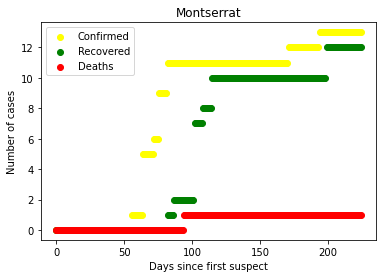

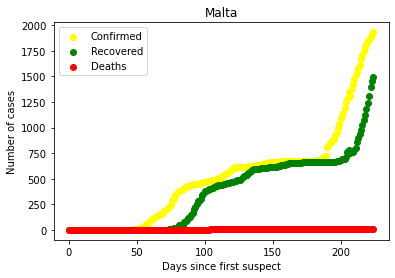

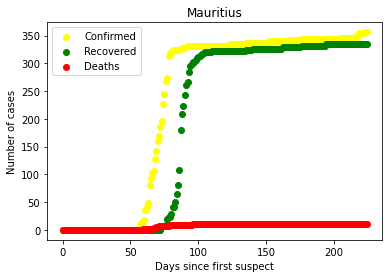

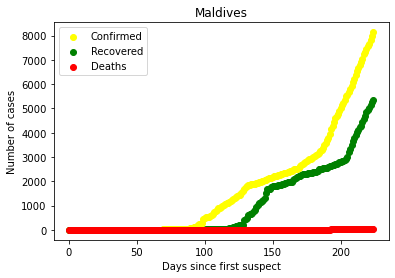

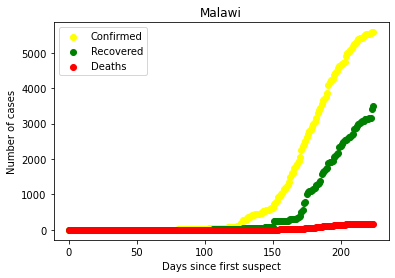

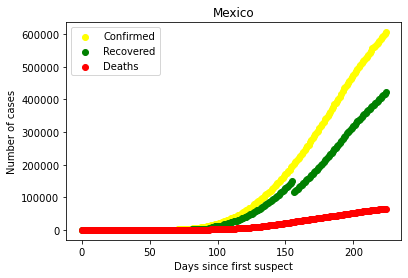

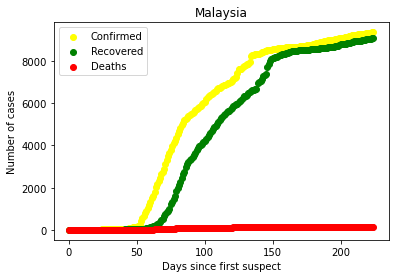

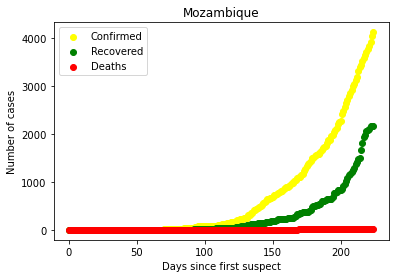

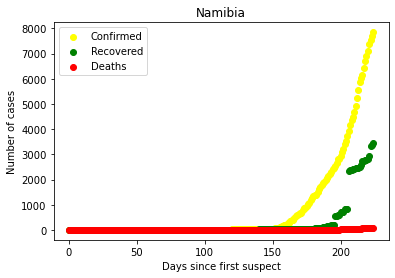

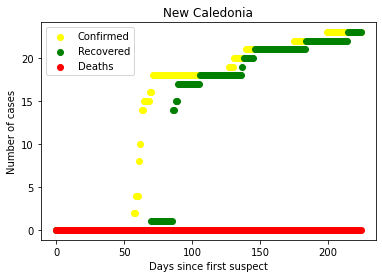

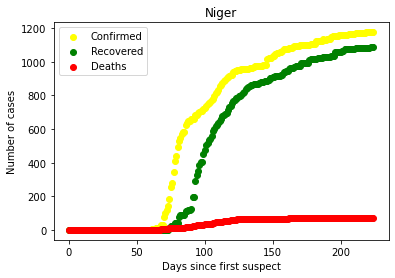

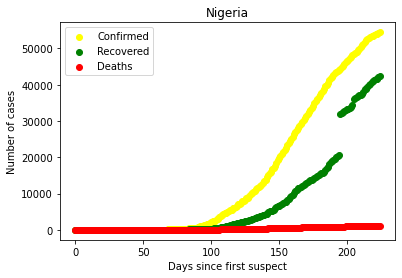

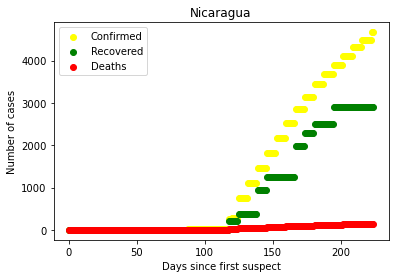

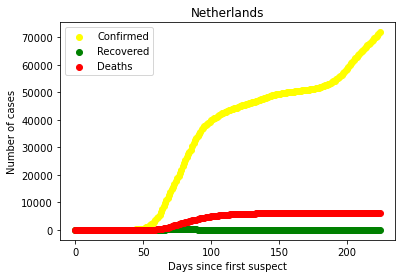

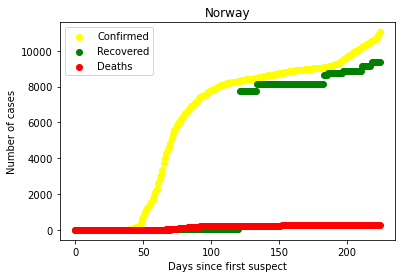

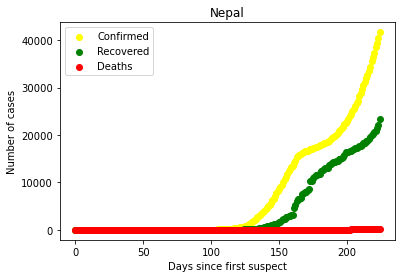

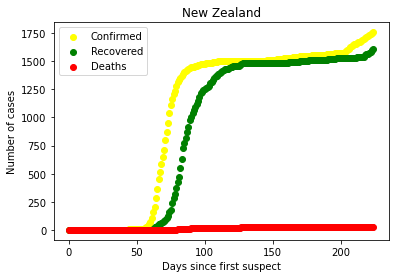

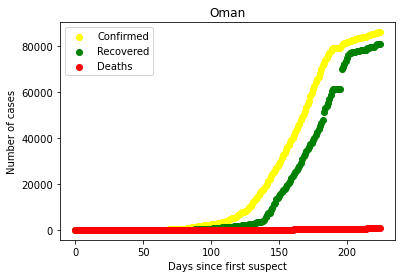

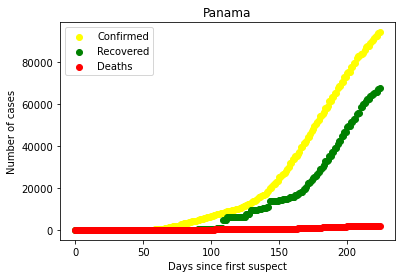

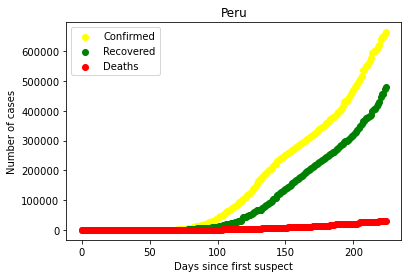

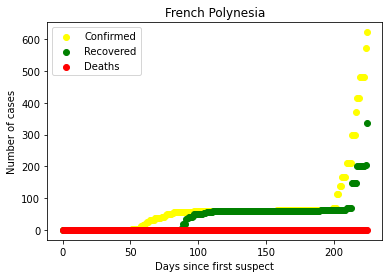

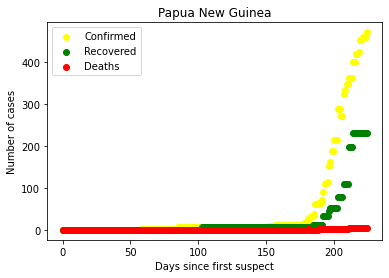

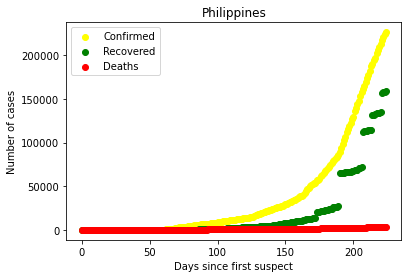

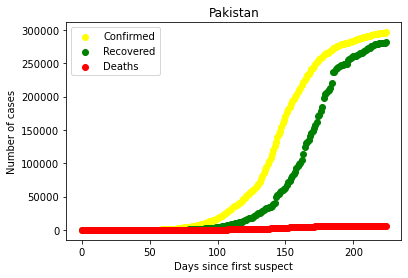

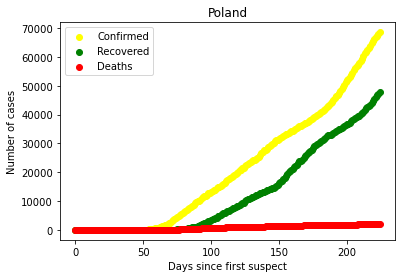

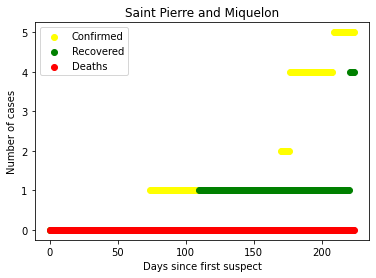

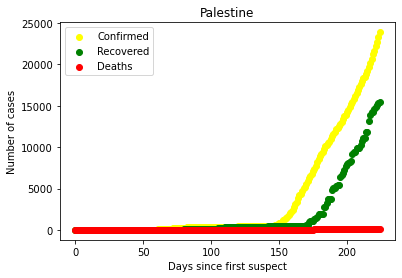

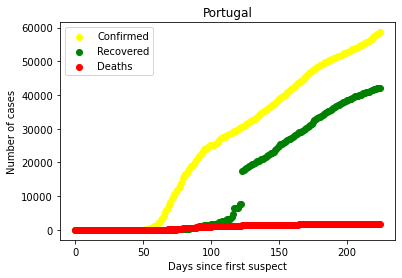

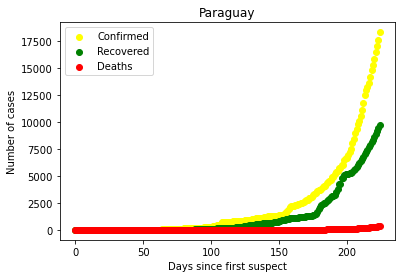

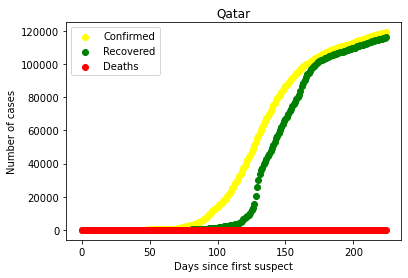

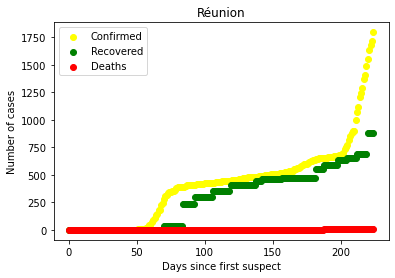

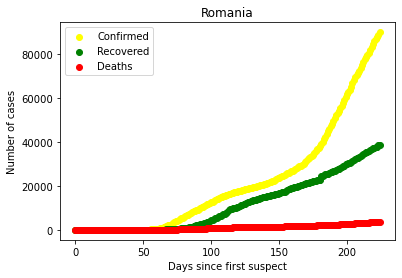

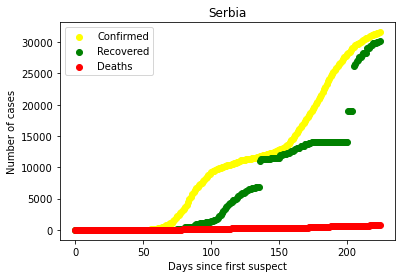

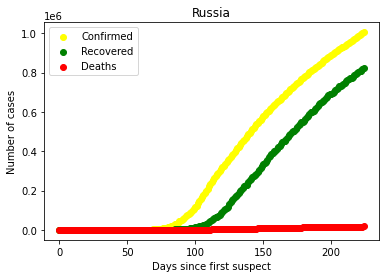

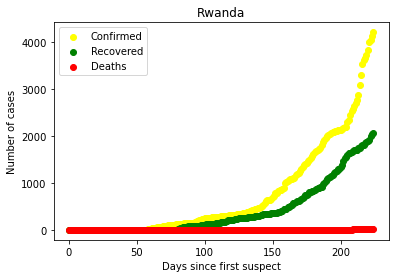

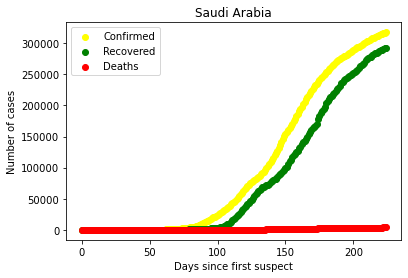

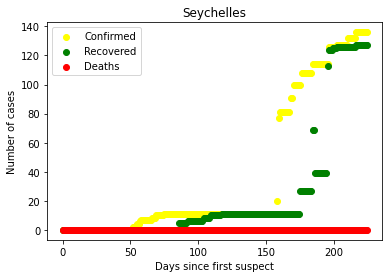

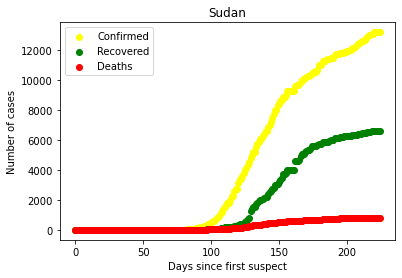

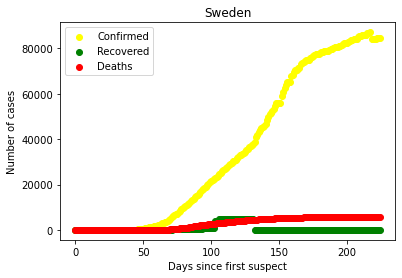

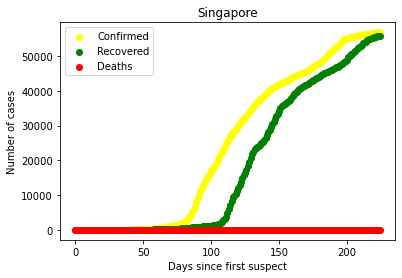

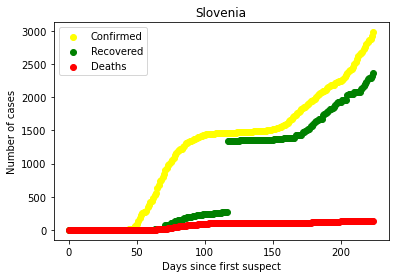

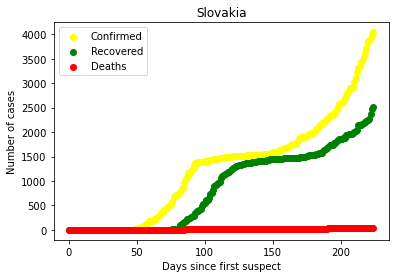

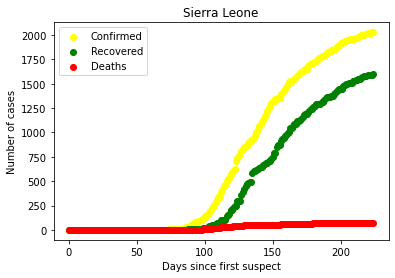

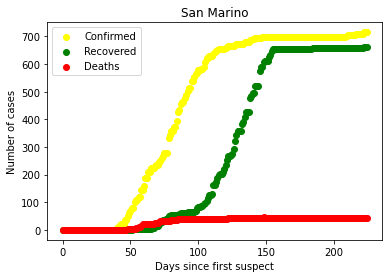

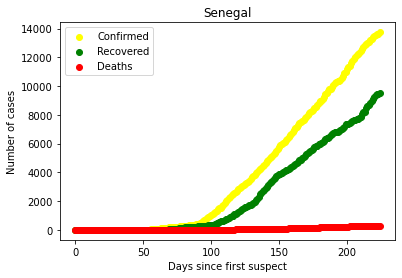

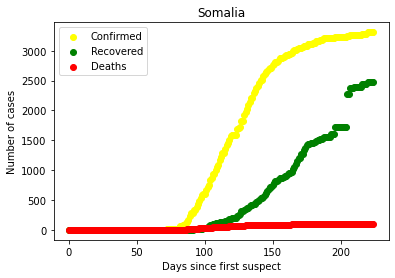

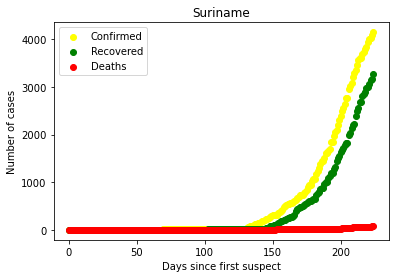

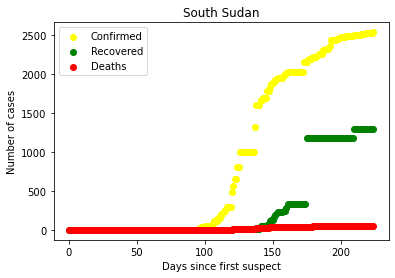

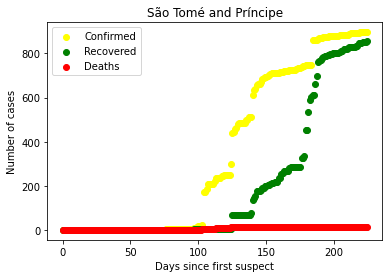

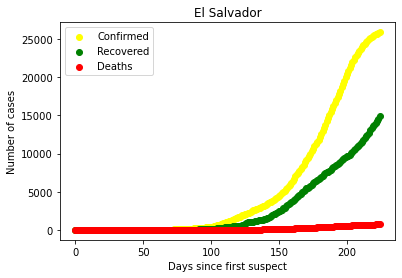

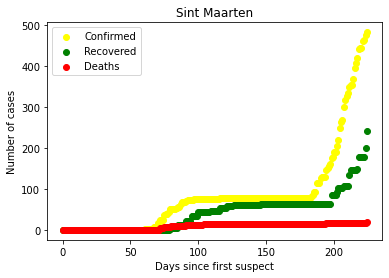

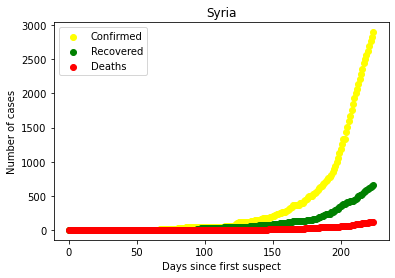

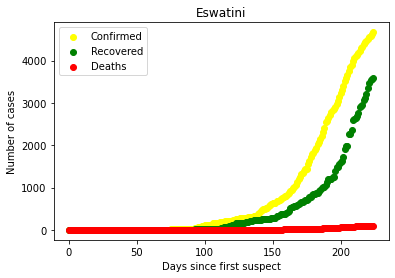

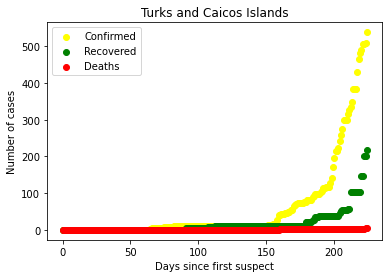

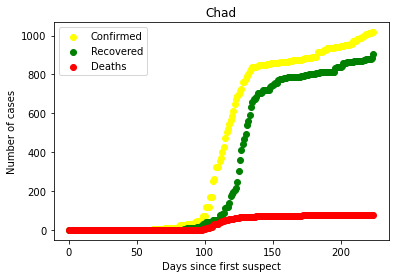

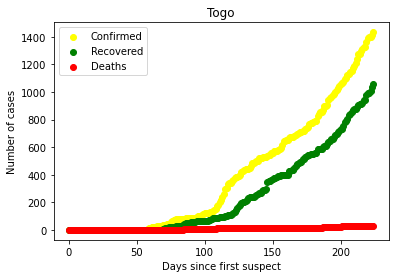

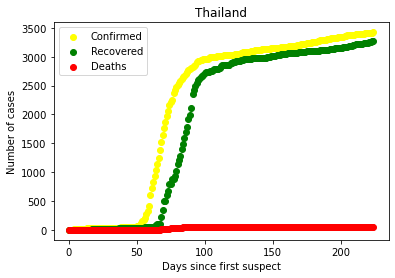

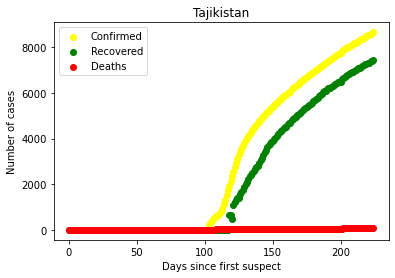

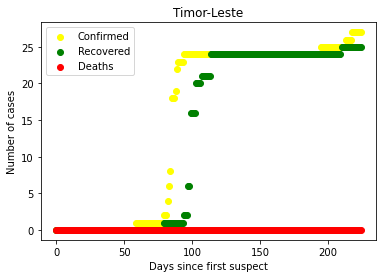

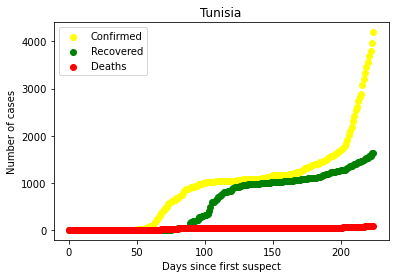

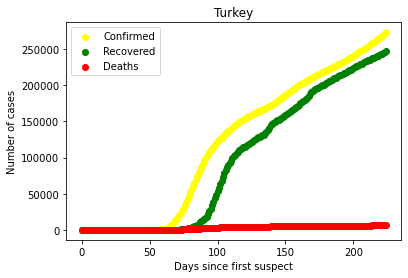

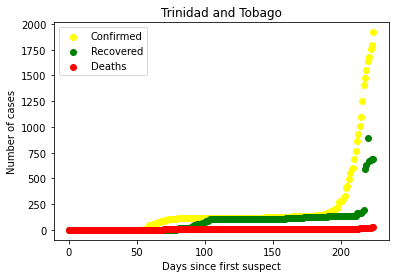

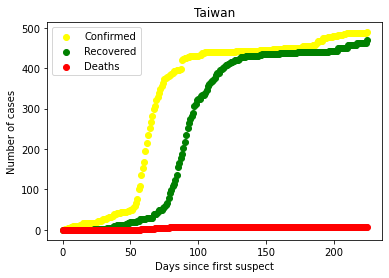

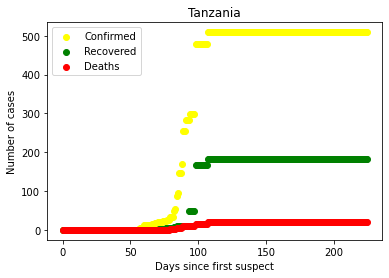

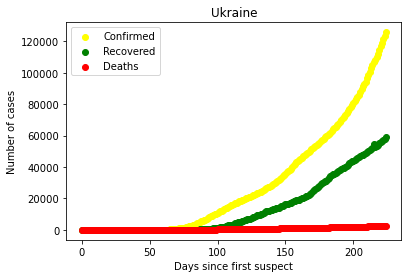

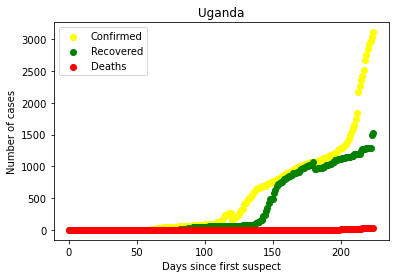

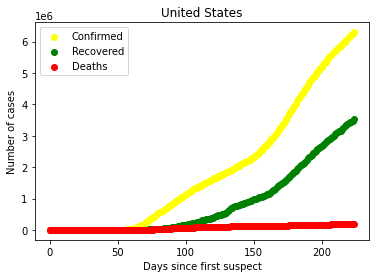

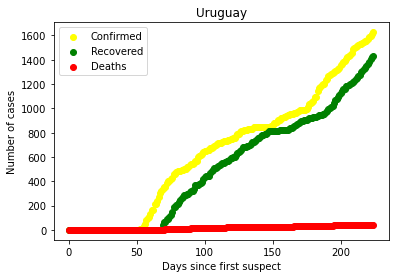

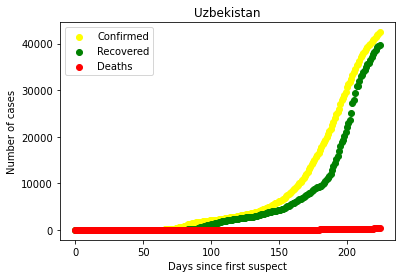

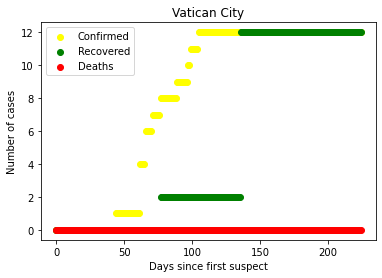

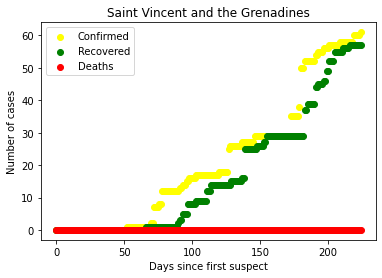

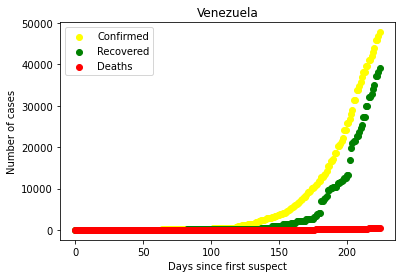

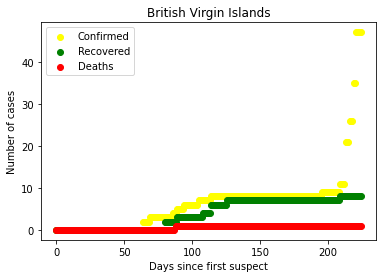

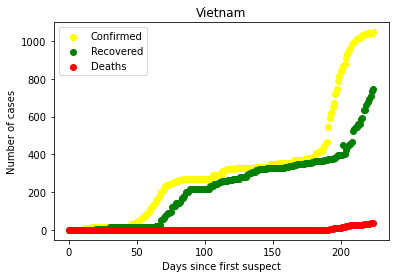

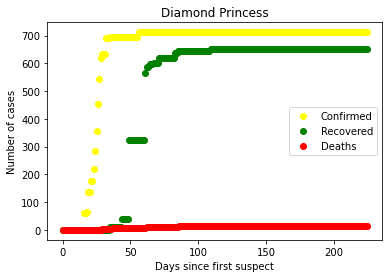

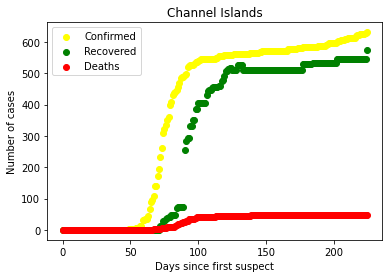

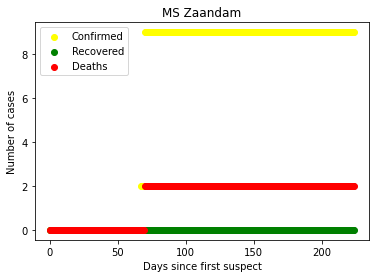

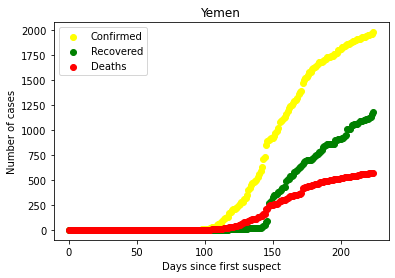

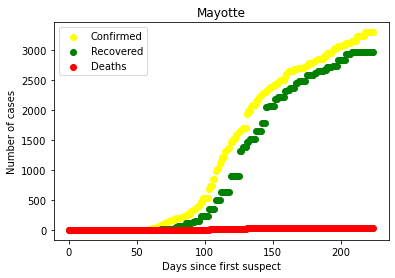

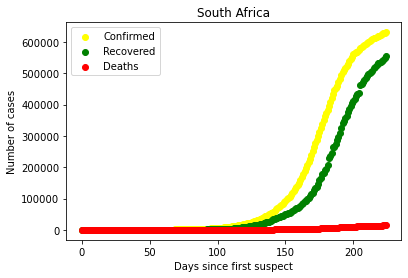

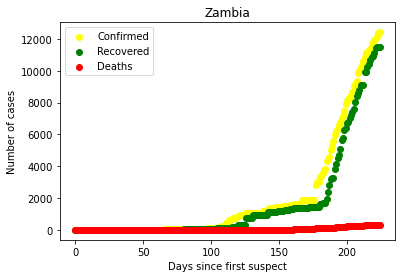

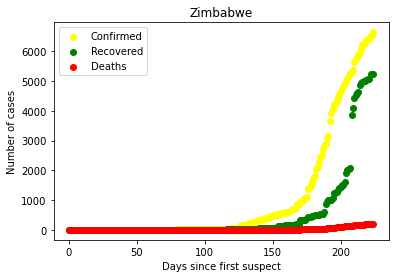

In [40]:
visualize(len(countries))

###### Now let's get the sumation of the overall trend globally 

In [190]:
global_trend = df.groupby(df['Date'])[['Date', 'Confirmed', 'Recovered', 'Deaths']].sum().reset_index()

In [193]:
def global_visalize(arg):
        country_indices = df[df['Country']==countries[index]].reset_index()
        plt.scatter(np.arange(0, len(arg)), arg['Confirmed'], color='yellow', label='Confirmed')
        plt.scatter(np.arange(0, len(arg)), arg['Recovered'], color='green', label='Recovered')
        plt.scatter(np.arange(0, len(arg)), arg['Deaths'], color='red', label='Deaths')
        plt.title('Worldwide')
        plt.xlabel('Days since first suspect')
        plt.ylabel('Number of cases')
        plt.legend()
        plt.show()

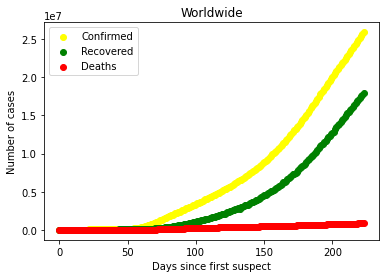

In [194]:
global_visalize(global_trend)

##### This is just a simple analysis of the dataset, but a prediction may be made with a ML & DL libraries like scikit-learn(ML), tensorflow(DL), pytorch(DL) etc for making prediction-classification-reggression and other advancements!!!!!!!!!!!!!!!!!!!!!!

### But whether you'regoing to use sk-learn, tensorflow, or pytorch later on...you're initially to use pandas, numpy, and matplotlib sometimes for pre processing the data to make the data ready for those heavy-weight kinds of libraries